
# Example usages
(from https://colab.research.google.com/drive/1dBcpXxHuc9YXv9yGllxlahx585hEmdbn?usp=sharing#scrollTo=2hlI6NEV_kgV)

![](https://douglasrizzo.com.br/catsim/_static/logo_text.svg)

This is a tutorial for [catsim](https://github.com/douglasrizzo/catsim/), a Python package which allows users to simulate computerized adaptive tests or to use in their own applications with the purpose of automating adaptive tests.

This tutorial was originally developed as a notebook on Google Colab, so, if for any reason you are seeing this outside of Colab, you can go back to Colab, copy it and test it yourself using [this link](https://colab.research.google.com/drive/14zEWoDudBCXF0NO-qgzoQpWUGBcJ2lPH?usp=sharing).

In this notebook, I'll exemplify both approaches. The documentation of all modules and functions used here are available in the [catsim website](https://douglasrizzo.com.br/catsim/index.html).

First, let's install catsim and import the relevant modules:

In [1]:

import os, sys

anaconda_path = os.path.dirname(sys.executable)
scripts_path = os.path.join(anaconda_path, 'Scripts')
if scripts_path not in sys.path: sys.path.insert(1, scripts_path)
command_str = f'{sys.executable} -m pip install catsim --upgrade'
print(command_str)
!{command_str}

C:\Users\DaveBabbitt\anaconda3\python.exe -m pip install catsim --upgrade
  Using cached catsim-0.17.3-py3-none-any.whl (49 kB)
  Using cached json_tricks-3.17.3-py2.py3-none-any.whl (27 kB)


In [2]:

# This function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank

# Simulation package contains the Simulator and all abstract classes
from catsim.simulation import *

# Initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *

# Selection package contains different item selection strategies
from catsim.selection import *

# Estimation package contains different proficiency estimation methods
from catsim.estimation import *

# Stopping package contains different stopping criteria for the CAT
from catsim.stopping import *

import catsim.plot as catplot
from catsim.irt import icc

import random

## Generating an item bank

The `generate_item_bank()` function provides a convenient way to generate realistic item parameter matrices from probability distributions.

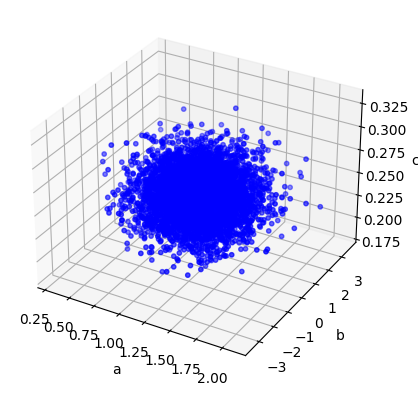

In [3]:

bank_size = 5000
items = generate_item_bank(bank_size, itemtype='3PL')
catplot.gen3d_dataset_scatter(items)

### Visualizing parameter distribution

`generate_item_bank()` returns a numpy.ndarray with 4 columns, corresponding to the discrimination, difficulty, guessing and upper-asymptote parameters of the 4-parameter logistic model of Item Response Theory.

We can plot and visualize their distributions like so:

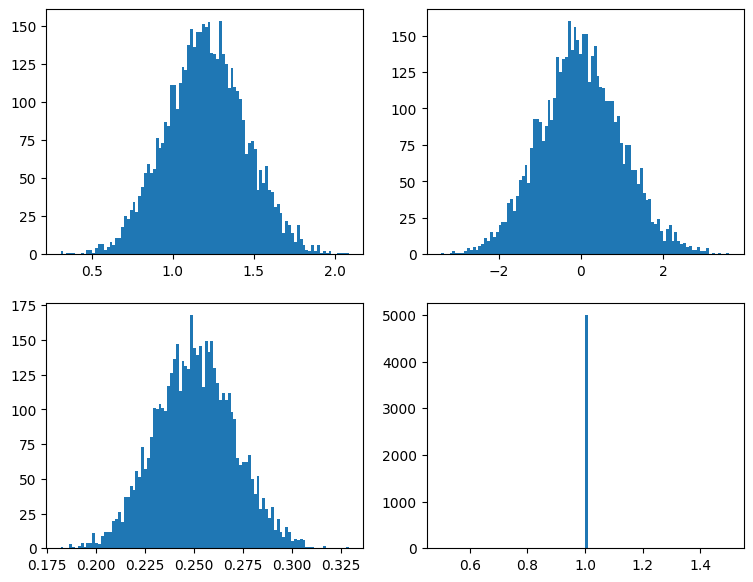

In [5]:

catplot.param_dist(items, figsize=(9, 7))

### Visualizing individual items

catsim also provides a function to plot the characteristic curve of an item. Notice how this item has been generated according to the 4-parameter logistic model of the Item Response Theory. Item banks under different logistic models can be generated by changing the `itemtype` parameter of `generate_item_bank()`.

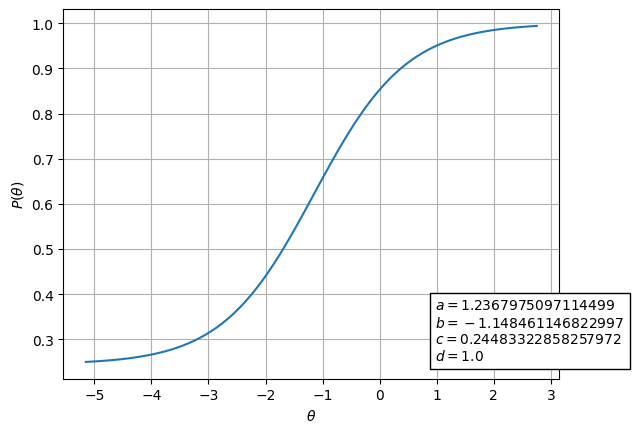

In [6]:

a, b, c, d = items[0]
catplot.item_curve(a, b, c, d)

## Running simulations

A simulation requires the following objects:

- an item parameter matrix
- a proficiency initializer, which sets the initial $\theta$ values for examinees
- an item selector, which selects items to be applied to examinees according to some rule
- a proficiency estimator, which estimates the new $\theta$ values for examinees after an item is answered
- a "stopper", an object which checks if the test must be stopped according to some rule

We have already created an item parameter matrix, so let's go ahead and create the other objects...

In [7]:

initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
stopper = MaxItemStopper(20)

catsim provides different options for each of the aforementioned types of objects in the following modules

- `catsim.simulation`
- `catsim.initialization`
- `catsim.selection`
- `catsim.estimation`

Each module also provides an abstract base class which can be inherited in order to create new methods that can be used in the simulation process.

### Creating a simulator

The Simulator is the object that takes all of the objects created previously and executes a CAT simulation. To represent the examinees, The Simulator can receive either an integer, which will be converted to a normal distribution, or a 1D `numpy.ndarray`, whose values will be used as the proficiencies of the examinees.

Here we will use an integer.

In [8]:

s = Simulator(items, 10, initializer, selector, estimator, stopper)

### Starting the simulation

To execute the simulations, call the simulate() method of the Simulator object.

In [9]:

s.simulate(verbose=True)

Starting simulation: Random Initializer Maximum Information Selector Numerical Search Estimator (bounded) Maximum Item Number Initializer 5000 items


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.31it/s]

Simulation took 0.8122565746307373 seconds


### Acessing simulation results

After the simulation if over, information is provided through the attributes of the Simulator:

In [10]:

print('Bias:', s.bias)
print('Mean squared error:', s.mse)
print('Root mean squared error:', s.rmse)

Bias: -0.14632588537413949
Mean squared error: 0.09412807069927817
Root mean squared error: 0.3068029835240821


Information for individual examinees can also be accessed through the attributes of the Simulator.

In [11]:

examinee_index = 0
print('Accessing examinee', examinee_index, 'results...')
print('    True proficiency:', s.examinees[examinee_index])
print('    Items administered:', s.administered_items[examinee_index])
print('    Responses:', s.response_vectors[examinee_index])
print('    Proficiency estimation during each step of the test:', s.estimations[examinee_index])

Accessing examinee 0 results...
    True proficiency: 0.36689524792533856
    Items administered: [806, 3525, 2492, 1808, 3642, 1335, 843, 647, 4006, 4247, 4918, 3012, 3048, 4797, 2047, 744, 1781, 2580, 4088, 359]
    Responses: [False, False, True, True, False, True, True, True, True, False, True, True, False, True, True, True, False, False, True, False]
    Proficiency estimation during each step of the test: [4.662070888429184, 0.6295680448003846, -1.3866833770140152, -0.3969149632850098, 0.02798713410516944, -0.5743186061594157, -0.36435996951903443, -0.19292819264085062, -0.06454528725934039, 0.0863474376094086, -0.11476175510033415, -0.017544141542826863, 0.0619126404454184, -0.07877884495450553, -0.0018117608903372273, 0.06322169681663613, 0.1341380353732672, 0.01610448204961015, -0.11867442536537588, -0.06995110671271876, -0.19246882184221276]


The test progress for an individual examinee can also be plotted using the `catsim.plot.test_progress(function)`. The amount of information in the chart can be tuned using different arguments for the function.

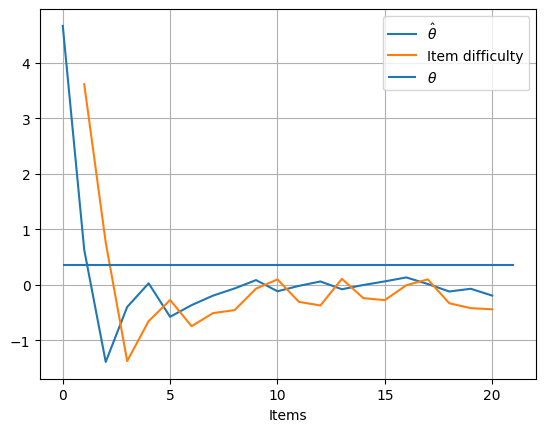

In [12]:

catplot.test_progress(simulator=s,index=0)

### Simulation example 2

This example uses a `numpy.ndarray` to represent examinees. We will also plot more information than before in our test progress plot, adding test information to it.


Starting simulation: Random Initializer Maximum Information Selector Numerical Search Estimator (bounded) Minimum Error Initializer 5000 items


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.54it/s]


Simulation took 1.1712186336517334 seconds


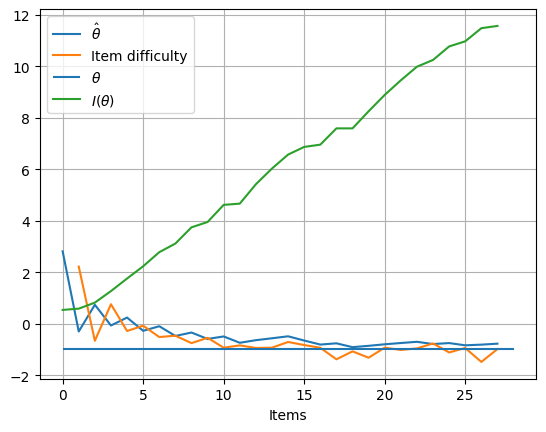

In [13]:

examinees = numpy.random.normal(size=10)
s = Simulator(items, examinees, RandomInitializer(), MaxInfoSelector(), NumericalSearchEstimator(), MinErrorStopper(.3))
s.simulate(verbose=True)
catplot.test_progress(simulator=s,index=0, info=True)

### Simulating non-adaptive tests

catsim can also simulate linear (non-adaptive) tests by using a linear item selector. The linear selector receives the item indices as arguments, retrieves them from the item parameter matrix and applies them in order to all examinees.

In [14]:

indexes = numpy.random.choice(items.shape[0], 50, replace=False)
print('The following items will be applied to the examinees in this order:', indexes)
s = Simulator(items, 10, RandomInitializer(), LinearSelector(indexes), NumericalSearchEstimator(), MaxItemStopper(50))
s.simulate(verbose=True)

The following items will be applied to the examinees in this order: [2081 4283 3476 4144  302 2185 2790 1133 3224 3625 1257 3472 4166 1977
 1717 1969 4069 3084 2601 4719  896 1685 4336 1816 3195 4711 3475 3542
 4893 3757  601 1598  189 4775 4729 3043  865 2678 2954  835 1479 1023
 4132 2726 4798  928 4159 2380 3934  966]

Starting simulation: Random Initializer Linear Selector Numerical Search Estimator (bounded) Maximum Item Number Initializer 5000 items


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.01it/s]

Simulation took 0.45430970191955566 seconds


Here, we will also plot the estimation error for an examinee's $\hat\theta$ value during the progress of the test.

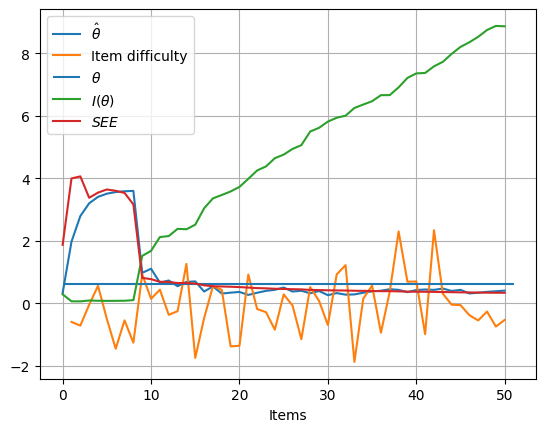

In [15]:

catplot.test_progress(simulator=s,index=0, info=True, see=True)

## Using catsim objects outside of a Simulator

The objects provided by catsim can also be used directly, outside of a simulation. This allows users to use these objects in their own software, to power their own CAT applications.


Let's pretend we are in the middle of a test application and create some dummy data for an examinee, as well as some objects we will use to select the next item for this examinee, re-estimate their proficiency and check if the test should be stopped or if a new item should be applied to the examinee.

In [16]:

responses = [True, True, False, False]
administered_items = [1435, 3221, 17, 881]

initializer = FixedPointInitializer(0)
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
stopper = MinErrorStopper(.2)

This dummy data means that the examinee has answered items 1435, 3221, 17 and 881 from our item bank (generated at the start of this notebook). They have answered the first two items correctly (represented by the `True` values in the `responses` list) and two items incorrectly (the last values in the list).

### Initializing $\hat\theta$

Even though this information is already enough to estimate the current proficiency of the examinee, we'll go ahead and use our initializer to estimate a dummy initial proficiency anyway.

In [17]:

est_theta = initializer.initialize()
print('Examinee initial proficiency:', est_theta)

Examinee initial proficiency: 0


### Estimating a new $\hat\theta$

Now, we will use the answers the examinee has given so far (remember, we're pretending they have already answered a few items) to estimate a more precise $\hat\theta$ proficiency for them.

Internally, the estimator uses the item bank and the indices of the administered items to get the relevant item parameters, then uses the response vector to know which items the examinee has answered correctly and incorrectly to generate the new value for $\hat\theta$.

Some estimators may or may not use the current value of $\hat\theta$ to speed up estimation.

**After getting to the end of the notebook, come back to this cell to simulate a new item being applied to this examinee**.

In [26]:

est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
print('Estimated proficiency, given answered items:', est_theta) # -1.6256716718164692

Estimated proficiency, given answered items: -0.8021633215082044


### Checking whether the test should end

We do not know whether the CAT should select another item to the examinee or if the test should end. The stopper will give us this answer through the `stop()` method.

In [19]:

_stop = stopper.stop(administered_items=items[administered_items], theta=est_theta)
print('Should the test be stopped:', _stop)

Should the test be stopped: False


### Selecting a new item

The selector takes the item parameter matrix and the current $\hat\theta$ value to select the new item the examinee will answer. It uses the indices of administered items to ignore them.

In [20]:

item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)
print('Next item to be administered:', item_index)

Next item to be administered: 2492


C:\Users\DaveBabbitt\anaconda3\lib\site-packages\catsim\selection.py:72: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  warn(


### Simulating a response

In order to apply the next item, we need to pretend here that the examinee has answered an item. In the real world, this information could be fetched by an external application, but here we will use IRT to simulate the answer probabilistically.

For that, we will use a hypothetical true proficiency value of $\theta$. It is important that this value is fixed, as it represents the abilities of a person when taking the test.

(By the way, this is exactly what the Simulator does during simulations.)

In [21]:

true_theta = 0.8
a, b, c, d = items[item_index]
prob = icc(true_theta, a, b, c, d)
correct = prob > random.uniform(0, 1)

print('Probability to correctly answer item:', prob)
print('Did the user answer the selected item correctly?', correct)

Probability to correctly answer item: 0.991171413731124
Did the user answer the selected item correctly? True


Finally, we add the index of the administered item to the examinee and their answer to the item to our lists and we are ready for the next step of the adaptive test.

Go back to the **"Estimating a new $\hat\theta$"** step above to simulate another step of the CAT.

In [25]:

administered_items.append(item_index)
responses.append(correct)